# Heisenberg model for a 1D chain of spins

Let's first start by writing the Heisenberg model for a 1-D spin chain.

$$ H = sum J(\sigma^{i} \sigma^{j} + sum h(\sigma^{i}$$

One important thing to notice is that the Heisenberg model deals with static spin and the evolution of them at their respective sites. Qubits can be treated as spins and hence the same operations $\sigma_{z}$ (for a spin) applied for qubits with the gate in the from $Z$. In other words, to implement the Heisenberg model in a quantum computer we do not need to go through transformations from rising and lowering operators to native gates.

Another thing we need to know before diving into specific cases is the Hamiltonian evolution

Let's start with the Schrodinguer equation

$$ i\hbar \frac{\partial|\psi>}{\partial t} == H |\psi>$$

Let's take the consideration that the Hamiltonian is time independent, then the solution is

$$ |\psi> = e^{-i\hbar t H}|\psi(0)> $$

This the solution to the time evolution of a Hamiltonian and that is what we are after

To be able to solve it we need to implement quantum gates to the quantum circuit at the initial state $ |\psi(0)> $

In general the Hamiltonian can be written in the from $H = H_{1} + H_{2} + ... $. If hamiltonians $H_{i}$ commute with each other then the next identity holds:

$$ e^{H} = e^{H_{1}}e^{H_{2}}e^{H_{3}}...e^{H_{n}}, where H = sum H_{i} $$

If the components of the hamiltonian do not commute then we can proceed with the Trotter decomposition

$$ e^{H} \simeq (e^{H_{1}\Delta M}e^{H_{2}}e^{H_{3}}...e^{H_{n}})^{1/\Delta M} $$

Then we can define a Trotter step by

$$ e^{H_{1}\Delta M}e^{H_{2}}e^{H_{3}}...e^{H_{n}}  $$

The Trotter number is defined as $ 1/\Delta M $, When the Trotter number tends to infinite we get the best accuracy to the approximation. Also, this Trotterization is know as the first oder one and there are higher order Trotterizations.

So far this is all we need to do the evolution of the Hamiltonian. Here we are going to write down an algorithm related to the Heisenberg model with nearest neighbors interactions.

1. Write down the Hamiltonian in the form of (3).
2. If the terms do not commute use Trotterization
3. If the terms commute then the exact solution is given by the equation (5)

## Case for nearest neighbor interaction off and a magnetic field along the z-direction

I will now write the Hamiltonian

$$ H = h_{z} sum \sigma^{i} $$

Then lets start with the simplest and trivial case for one spin only

$$ H = h_{z} \sigma^{1}_{z} $$

In such a case the solution to the Schrodinguer equation follows

$$ |\psi> = e^{-it H}|\psi(0)> $$

introducing equation (5) to (6) we get that

$$ |\psi> = e^{-it\hbar h_{z}\sigma^{1}_{z}}|\psi(0)> $$

Now to implement this in a quantum circuit we need to apply the gate $e^{-it\hbar h_{z}\sigma^{1}_{z}} $ to $|\psi(0)>$. In qiskit we notice that the gate that we need is described as the z-rotation gate

$$ R_{z}(\theta) = e^{-i\frac{\theta}{2}\sigma_{z}}$$, for our case $\theta = 2t\hbar h_{z}$

It is possible to write down the n-qubits hamiltonian as follows:

$$ |\psi> = e^{-it\hbar h_{z}sum\sigma^{i}_{z}}|\psi(0)> $$

Equation # does not require Trotterization and it is the full solution to the problem.

We can implement it in qiskit as follows

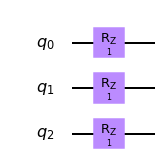

In [41]:
# Here we are importing all packages from qiskit
from qiskit import *
from math import pi

# define the number of qubits
num_q = 3
# Here create the quantum circuit with one qubit
qc = QuantumCircuit(num_q)

# Here we apply the Rz gate to the ith-qubit
for i in range(num_q):
    qc.rz(1,i)

# Here we draw the quantum circuit
qc.draw(output='mpl')

In the previous circuit we have the possiblity to set up n-qubits to run the case of $h_{z}$. The hamiltonians $H_{i} = h_{z}\sigma^{i}_{z}$ commute with each other so no need to to Trotterization

## Case for nearest neighbor interactions turn off and a uniform magnetic field along x-,y-, and z- directions

The Hamiltonian for the trivial case for one spin is

$$ H = h\sigma_{x}^{1} + h\sigma_{y}^{1} + h\sigma_{z}^{1} $$

In such a case the Pauli matrices do not commute with each other, so it is time to use Trotterization to solve approximately this problem.

$$ e^{-it\hbar H} = e^{-it\hbar (h\sigma_{x}^{1} + h\sigma_{y}^{1} + h\sigma_{z}^{1})} $$

After the Trotterization

$$ e^{-it\hbar H} \simeq (e^{-i\Delta t \hbar h \sigma_{x}^{1}}e^{-i\Delta t \hbar h \sigma_{y}^{1}}e^{-i\Delta t \hbar h \sigma_{z}^{1}})^{t/\Delta t}$$

A Trotter step is the expresion inside the parenthesis for eqution #. The Trotterization of the n-qubit case is

$$ e^{-it\hbar H} \simeq (e^{-i\Delta t \hbar h \sigma_{x}^{1}}e^{-i\Delta t \hbar h \sigma_{y}^{1}}e^{-i\Delta t \hbar h \sigma_{z}^{1}}e^{-i\Delta t \hbar h \sigma_{x}^{2}}e^{-i\Delta t \hbar h \sigma_{y}^{2}}e^{-i\Delta t \hbar h \sigma_{z}^{2}}...)^{t/\Delta t}$$

Note that the exponential to the Puali matrices are the rotation gates along different axis.

We can implement a Trotter step in qiskit as follows

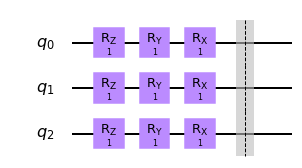

In [18]:
# define the number of qubits
num_q = 3
# Here create the quantum circuit with one qubit
qc = QuantumCircuit(num_q)

# Here we apply the Rz, Rx, and Ry gates to the ith-qubit
for i in range(num_q):
    qc.rz(1,i)
    qc.ry(1,i)
    qc.rx(1,i)
    
qc.barrier()

# Here we draw the quantum circuit
qc.draw(output='mpl')

## Interaction ZZ term turn on and a uniform magnetic field along x-, y-, and z- directions

For such a case the 2 spin Hamiltonian goes as follows:

$$ H = J(\sigma^{1}_{z}\sigma^{2}_{z}) + h(\sigma^{1}_{x}+\sigma^{1}_{y}+\sigma^{1}_{z}) h(\sigma^{2}_{x}+\sigma^{2}_{y}+\sigma^{2}_{z}) $$

for which 

$$ e^{-it\hbar H} = e^{-it\hbar (J(\sigma^{1}_{z}\sigma^{1}_{z}) + h(\sigma^{1}_{x}+\sigma^{1}_{y}+\sigma^{1}_{z})+h(\sigma^{2}_{x}+\sigma^{2}_{y}+\sigma^{2}_{z}))} $$

A Trotter step is

$$ e^{-it \hbar H} \simeq e^{-i\Delta t \hbar J(\sigma^{1}_{z}\sigma^{2}_{z})}e^{-i\Delta t \hbar h \sigma^{1}_{x}}e^{-i\Delta t \hbar h \sigma^{1}_{y}}e^{-i\Delta t \hbar h \sigma^{1}_{z}}e^{-i\Delta t \hbar h \sigma^{2}_{x}}e^{-i\Delta t \hbar h \sigma^{2}_{y}}e^{-i\Delta t \hbar h \sigma^{2}_{z}} $$

We can use the identity

$$ e^{-i\Delta t \hbar J\sigma^{1}_{z}\sigma^{2}_{z}} = CNOT^{1,2}e^{-i\Delta t \hbar J\sigma^{2}_{z}}CNOT^{1,2} $$

An plugging it in the previous equation we end up with

$$ e^{-it \hbar H} \simeq CNOT^{1,2}e^{-i\Delta t \hbar J\sigma^{2}_{z}}CNOT^{1,2}e^{-i\Delta t \hbar h \sigma^{1}_{x}}e^{-i\Delta t \hbar h \sigma^{1}_{y}}e^{-i\Delta t \hbar h \sigma^{1}_{z}}e^{-i\Delta t \hbar h \sigma^{2}_{x}}e^{-i\Delta t \hbar h \sigma^{2}_{y}}e^{-i\Delta t \hbar h \sigma^{2}_{z}} $$

We can generalize this equation to the n-th qubit case as follows (this would a Trotter step)

$$ e^{-it \hbar H} \simeq product(CNOT^{i,i+1}e^{-i\Delta t \hbar J\sigma^{2}_{z}}CNOT^{i,i+1})product(e^{-i\Delta t \hbar h \sigma^{i}_{x}}e^{-i\Delta t \hbar h \sigma^{i}_{y}}e^{-i\Delta t \hbar h \sigma^{i}_{z}}e^{-i\Delta t \hbar h \sigma^{i+1}_{x}}e^{-i\Delta t \hbar h \sigma^{i+1}_{y}}e^{-i\Delta t \hbar h \sigma^{i+1}_{z}}) $$

The implementatio is Qiskit is as follow

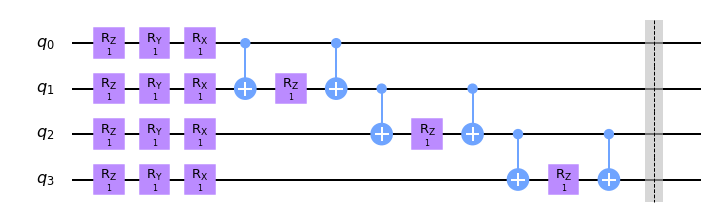

In [26]:
# define the number of qubits
num_q = 4
# Here create the quantum circuit with one qubit
qc = QuantumCircuit(num_q)

# Here is the loop that applies the Rz, Rx, and Ry gates to the ith-qubit
for i in range(num_q):
    qc.rz(1,i)
    qc.ry(1,i)
    qc.rx(1,i)
    
for i in range(num_q-1):
    qc.cx(i,i+1)
    qc.rz(1,i+1)
    qc.cx(i,i+1)           
    
qc.barrier()

# Here we draw the quantum circuit
qc.draw(output='mpl')

We can notice that this specific way of implmenting the gates it is not so efficient because the coupling between 3rd and 4th qubit waits until the coupling of qubit 2nd and 3rd is excuted. We can reduce the circuit depth byt grouping together the odd interactions and the even ones.

The Qiskit implementation is as follows

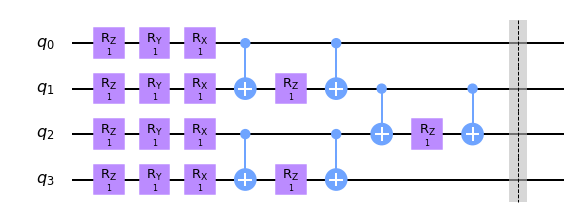

In [31]:
# define the number of qubits
num_q = 4
# Here create the quantum circuit with one qubit
qc = QuantumCircuit(num_q)

# Here is the loop that applies the Rz, Rx, and Ry gates to the ith-qubit
for i in range(num_q):
    qc.rz(1,i)
    qc.ry(1,i)
    qc.rx(1,i)
    
for i in range(num_q-1):
    if ((i%2)==0 and (i <= (num_q)-2)):
        qc.cx(i,i+1)
        qc.rz(1,i+1)
        qc.cx(i,i+1)
    
for i in range(num_q-1):
    if ((i%2)==1 and (i <= (num_q)-2)):
        qc.cx(i,i+1)
        qc.rz(1,i+1)
        qc.cx(i,i+1)           
    
qc.barrier()

# Here we draw the quantum circuit
qc.draw(output='mpl')

## Case with nearest neighbor interactions and a constant magnetic field on for x-,y-, and z- directions

Let's start with the simplest case for 2 spins only. The Hamiltonian is

$$ e^{-it\hbar H} = e^{-it\hbar (J(\sigma^{1}_{x}\sigma^{2}_{x}+ \sigma^{1}_{y}\sigma^{2}_{y}+\sigma^{1}_{z}\sigma^{2}_{z})+h(\sigma^{1}_{x}+\sigma^{1}_{y}+\sigma^{1}_{z}+\sigma^{2}_{x}+\sigma^{2}_{y}+\sigma^{2}_{z}))} $$

A Trotter step is

$$ e^{-it\hbar H} \simeq e^{-i\Delta t\hbar J \sigma^{1}_{x}\sigma^{2}_{x}}e^{-i\Delta t\hbar J \sigma^{1}_{y}\sigma^{2}_{y}}e^{-i\Delta t\hbar J \sigma^{1}_{z}\sigma^{2}_{z}}e^{-i\Delta t \hbar h \sigma^{1}_{x}}e^{-i\Delta t \hbar h \sigma^{1}_{y}}e^{-i\Delta t \hbar h \sigma^{1}_{z}}e^{-i\Delta t \hbar h \sigma^{2}_{x}}e^{-i\Delta t \hbar h \sigma^{2}_{y}}e^{-i\Delta t \hbar h \sigma^{2}_{z}} $$

Furthermore we can write the Trotterization for the n-spin system

$$ e^{-it\hbar H} \simeq producte^{-i\Delta t\hbar J \sigma^{i}_{x}\sigma^{i+1}_{x}}e^{-i\Delta t\hbar J \sigma^{i}_{y}\sigma^{i+1}_{y}}e^{-i\Delta t\hbar J \sigma^{i}_{z}\sigma^{i+1}_{z}}producte^{-i\Delta t \hbar h \sigma^{i}_{x}}e^{-i\Delta t \hbar h \sigma^{i}_{y}}e^{-i\Delta t \hbar h \sigma^{i}_{z}}e^{-i\Delta t \hbar h \sigma^{i+1}_{x}}e^{-i\Delta t \hbar h \sigma^{i+1}_{y}}e^{-i\Delta t \hbar h \sigma^{i+1}_{z}} $$

We need to use the following identities to be able to implement the quantum circuit 

$$ e^{-i\Delta t \hbar J\sigma^{1}_{x}\sigma^{2}_{x}} = CNOT^{1,2}e^{-i\Delta t \hbar J\sigma^{2}_{x}}CNOT^{1,2} $$

$$ e^{-i\Delta t \hbar J\sigma^{1}_{y}\sigma^{2}_{y}} = CNOT^{1,2}e^{-i\Delta t \hbar J\sigma^{2}_{y}}CNOT^{1,2} $$

And we find that the product of Pauli matrices can be decomposed in rotation gates around x-,y-, and z-. Introducing the previous identities into the Trotter step we find

$$ e^{-it\hbar H} \simeq productCNOT^{i,i+1}e^{-i\Delta t \hbar J\sigma^{i+1}_{x}}CNOT^{i,i+1}CNOT^{i,i+1}e^{-i\Delta t \hbar J\sigma^{i+1}_{x}}CNOT^{i,i+1}CNOT^{I,i+1}e^{-i\Delta t \hbar J\sigma^{i+1}_{x}}CNOT^{i,i+1}producte^{-i\Delta t \hbar h \sigma^{i}_{x}}e^{-i\Delta t \hbar h \sigma^{i}_{y}}e^{-i\Delta t \hbar h \sigma^{i}_{z}}e^{-i\Delta t \hbar h \sigma^{i+1}_{x}}e^{-i\Delta t \hbar h \sigma^{i+1}_{y}}e^{-i\Delta t \hbar h \sigma^{i+1}_{z}} $$

The Qiskit implementation of the Heisenberg model with a constant J coupling and a constant magnetic field

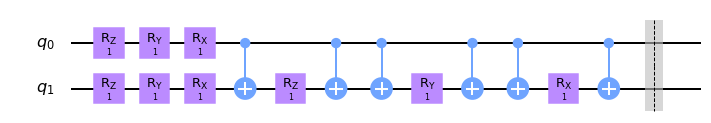

In [37]:
# define the number of qubits
num_q = 2
# Here create the quantum circuit with one qubit
qc = QuantumCircuit(num_q)

# Here is the loop that applies the Rz, Rx, and Ry gates to the ith-qubit
for i in range(num_q):
    qc.rz(1,i)
    qc.ry(1,i)
    qc.rx(1,i)
    
for i in range(num_q-1):
    if ((i%2)==0 and (i <= (num_q)-2)):
        qc.cx(i,i+1)
        qc.rz(1,i+1)
        qc.cx(i,i+1)
        qc.cx(i,i+1)
        qc.ry(1,i+1)
        qc.cx(i,i+1)
        qc.cx(i,i+1)
        qc.rx(1,i+1)
        qc.cx(i,i+1)

for i in range(num_q-1):
    if ((i%2)==1 and (i <= (num_q)-2)):
        qc.cx(i,i+1)
        qc.rz(1,i+1)
        qc.cx(i,i+1)
        qc.cx(i,i+1)
        qc.ry(1,i+1)
        qc.cx(i,i+1)
        qc.cx(i,i+1)
        qc.rx(1,i+1)
        qc.cx(i,i+1)          
    
qc.barrier()

# Here we draw the quantum circuit
qc.draw(output='mpl')

A Trotter step for the 1-D Heisenberg Hamiltonian has 6 CNOT gates and 9 rotation gates. Fortunately it is possible to reduce the number of CNOT gates by using the following identity [ref]

$$ e^{-it\hbar J(\sigma^{1}_{x}\sigma^{2}_{x}+\sigma^{1}_{y}\sigma^{2}_{y}+\sigma^{1}_{z}\sigma^{2}_{z})} = R^{1}_{z}(\frac{pi}{2})H^{1}H^{2}CNOT^{1,2}H^{1}H^{2}R^{2}_{y}(\frac{pi}{2}-2t\hbar J)CNOT^{1,2}R^{2}_{y}(2t\hbar J-\frac{pi}{2})R^{1}_{z}(\frac{pi}{2}-2t\hbar J)H^{1}H^{2}CNOT^{1,2}H^{1}H^{2}R^{2}_{z}(-\frac{pi}{2}) $$

I can see that the nearest neighbor term in the Heisenberg model now contains 3 CNOT gates, as opposed to 6 in the previous decomposition.

The implementation in Qiskit is


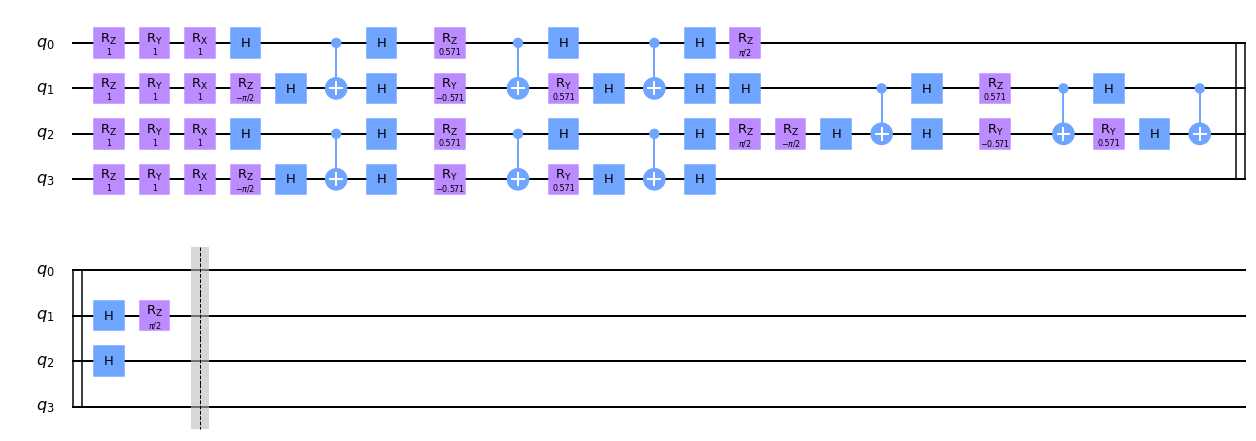

In [43]:
# define the number of qubits
num_q = 4
# Here create the quantum circuit with one qubit
qc = QuantumCircuit(num_q)

# Here is the loop that applies the Rz, Rx, and Ry gates to the ith-qubit
for i in range(num_q):
    qc.rz(1,i)
    qc.ry(1,i)
    qc.rx(1,i)
    
for i in range(num_q-1):
    if ((i%2)==0 and (i <= (num_q)-2)):
        qc.rz(-pi/2,i+1)
        qc.h(i)
        qc.h(i+1)
        qc.cx(i,i+1)
        qc.h(i)
        qc.h(i+1)
        qc.rz(pi/2-1,i)
        qc.ry(1-pi/2,i+1)
        qc.cx(i,i+1)
        qc.ry(pi/2-1,i+1)
        qc.h(i)
        qc.h(i+1)
        qc.cx(i,i+1)
        qc.h(i)
        qc.h(i+1)
        qc.rz(pi/2,i)

for i in range(num_q-1):
    if ((i%2)==1 and (i <= (num_q)-2)):
        qc.rz(-pi/2,i+1)
        qc.h(i)
        qc.h(i+1)
        qc.cx(i,i+1)
        qc.h(i)
        qc.h(i+1)
        qc.rz(pi/2-1,i)
        qc.ry(1-pi/2,i+1)
        qc.cx(i,i+1)
        qc.ry(pi/2-1,i+1)
        qc.h(i)
        qc.h(i+1)
        qc.cx(i,i+1)
        qc.h(i)
        qc.h(i+1)
        qc.rz(pi/2,i)
    
qc.barrier()

# Here we draw the quantum circuit
qc.draw(output='mpl')

In [ ]:
I will end with the full formula for the Heisenberg model after Trotterization
and then I will write the code and it will show in the diagram

Then I will say that a way to make it more compact is to use the identities
for paper such

and then I will write the identity and then show the full code and how it run

This is where I want to end, how do I get there?